In [93]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from termcolor import colored
import cmath

In [94]:
nf = 3.48
ns = 1.45
nc = 1.00
a  = 1.0e-6
lmbd = 3e-6
c0 = 299792458
pi = np.pi

# Modo TE

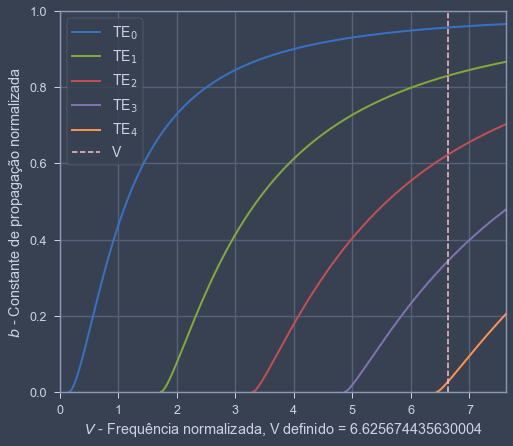

In [101]:
k0 = 2*np.pi/lmbd 
Vescolhido = k0*a*np.sqrt(nf**2 - ns**2)
sigma = (ns**2 - nc**2)/(nf**2 - ns**2)

b  = np.linspace(0, .99, 1000)
nm =int(1 +np.floor((2*Vescolhido - np.arctan(np.sqrt(sigma)))/np.pi))
indicesnb = np.zeros(nm)

for m in range(nm):
  V = 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(np.sqrt((b+sigma)/(1-b))) + np.arctan(np.sqrt((b)/(1-b))))
  indicesnb[m] = int(next(x for x, val in enumerate(V) if val > Vescolhido))
  plt.plot(V, b, linewidth = 2, label = 'TE$_{%d}$' %(m))

plt.axvline(Vescolhido,label = "V",color="pink",ls='--')
plt.xlim([0,Vescolhido + 1])
plt.ylim([0,1])
plt.xlabel('$V$ - Frequência normalizada, V definido = {0}'.format(Vescolhido))
plt.ylabel(r'$b$ - Constante de propagação normalizada')
plt.grid(True)
plt.legend(fontsize = 14)

In [112]:

tol = 1e-6
r = 0.5
R = k0*a*np.sqrt(nf**2-ns**2) # V
u = np.zeros(nm)
u1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
bnormalizado = np.zeros(nm)
for m in range(nm):
    u[m] = 20
    u1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(sigma)
    while(np.absolute(u1[m]-u[m])>tol):
        u[m] = u1[m]
        F = m*pi/2 + np.arctan(v[m]/u[m])/2 + np.arctan(w[m]/u[m])/2
        u1[m] = r*F + (1-r)*u[m]
        v[m] = np.sqrt(R**2 - u1[m]**2)
        w[m] = np.sqrt((R**2)*sigma + v[m]**2)
    bnormalizado[m] = (v[m]/R)**2
    print(bnormalizado[m])





0.9573596483514284
0.8304039137904627
0.6225939951142618
0.3427443500851795
0.025273148507560315


In [111]:
phi = np.zeros(nm)
beta = np.zeros(nm)
kf = np.zeros(nm)
alphas = np.zeros(nm) 
alphac = np.zeros(nm)
for m in range(nm):
    phi[m] = m*pi/2 + np.arctan(w[m]/u[m])/2 - np.arctan(v[m]/u[m])/2
    beta[m] = np.sqrt(bnormalizado[m]*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)
    kf[m] = np.sqrt(k0**2 * nf**2 - beta[m]**2)
    alphas[m] = np.sqrt(beta[m]**2 - k0**2 * ns**2)
    alphac[m] = np.sqrt(beta[m]**2 - k0**2 * nc**2)
print(alphas)


[6482875.05492009 6037745.26390062 5227963.6111352  3878959.49361829
 1053318.63315062]


In [99]:
#Calcular graficamente os modos

# print("Valores de nb para cada modo:")
# bn = np.zeros(nm)
# for m in range(nm):
#     bn[m] = (b[int(indicesnb[m])] + b[int(indicesnb[m]-1)])/2
#     print("Para TE{0}: nb = {1}".format(m,bn[m]))

# beta = np.sqrt(bn*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)

# print("\nValores de beta para cada modo:")
# for m in range(nm):
#     print("Para TE{0}: beta = {1}".format(m,beta[m]))


Valores de nb para cada modo:
Para TE0: nb = 0.957792792792793
Para TE1: nb = 0.829954954954955
Para TE2: nb = 0.6228378378378379
Para TE3: nb = 0.3423873873873874
Para TE4: nb = 0.02527027027027027

Valores de beta para cada modo:
Para TE0: beta = 7160257.0366089465
Para TE1: beta = 6757015.300937577
Para TE2: beta = 6046892.186033372
Para TE3: beta = 4924759.207170224
Para TE4: beta = 3214335.2020362006


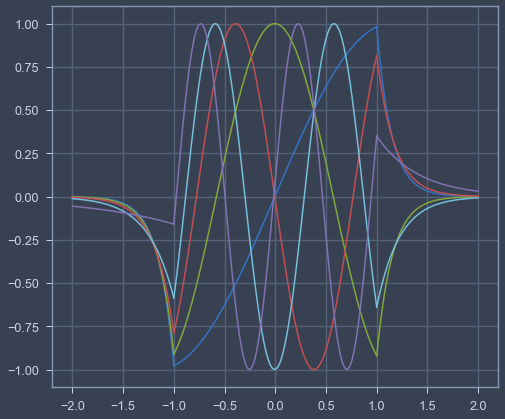

In [141]:
H1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']

Hzf = np.zeros(nm)
Hzc = np.zeros(nm)
Hzs = np.zeros(nm)

for m in range(nm):
    Hzf = H1*np.sin(kf[m]*xf + phi[m])
    Hzc = H1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))
    Hzs = -H1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))
    plt.plot(xs/a,Hzs,cores[m],xf/a,Hzf,cores[m],xc/a,Hzc, cores[m])






